### Import and preprocess the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\91777\Internship\heart.csv")
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


### Train a Decision Tree Classifier and visualize the tree.

In [3]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

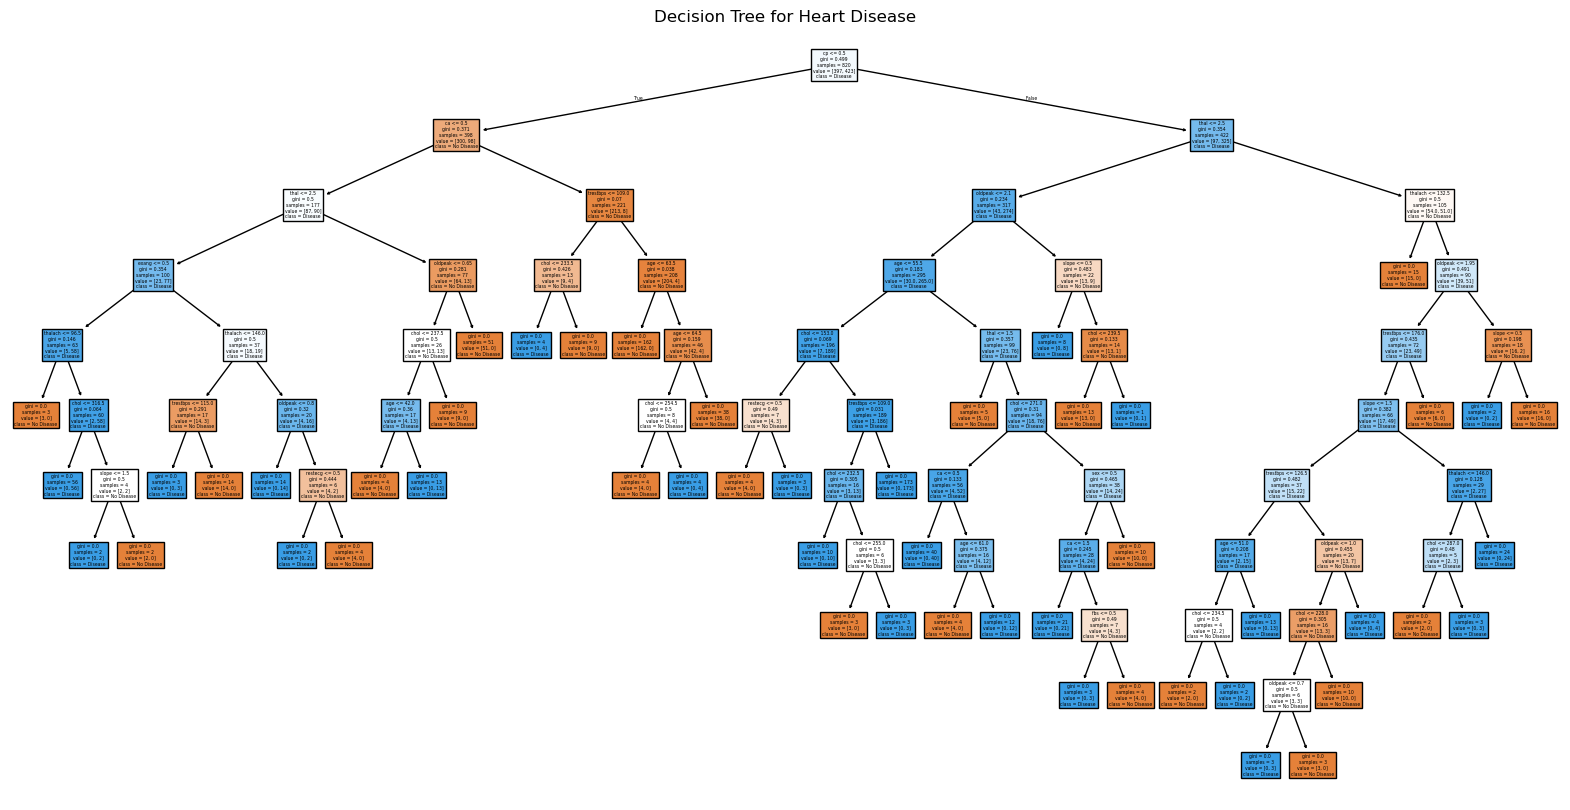

In [4]:
# Train Decision Tre
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.title("Decision Tree for Heart Disease")
plt.show()


### Analyze overfitting and control tree depth.

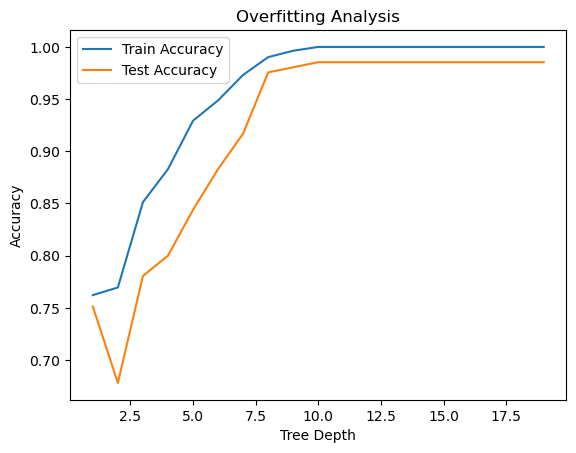

In [5]:
# Depth control to avoid overfitting
train_accuracies = []
test_accuracies = []
depths = range(1, 20)

for d in depths:
    dt = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt.fit(X_train, y_train)
    train_accuracies.append(dt.score(X_train, y_train))
    test_accuracies.append(dt.score(X_test, y_test))

# Plot accuracy vs depth
plt.plot(depths, train_accuracies, label='Train Accuracy')
plt.plot(depths, test_accuracies, label='Test Accuracy')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Overfitting Analysis")
plt.legend()
plt.show()


### Train a Random Forest and compare accuracy.

In [6]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Accuracy Comparison
dt_acc = accuracy_score(y_test, dt.predict(X_test))
rf_acc = accuracy_score(y_test, rf.predict(X_test))

print(f"Decision Tree Accuracy: {dt_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")


Decision Tree Accuracy: 0.9854
Random Forest Accuracy: 0.9854


### Interpret feature importances.

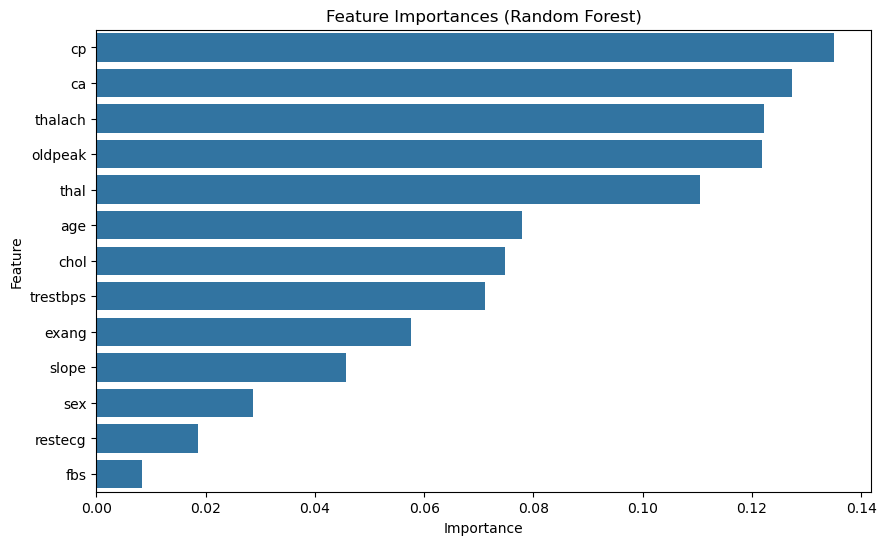

In [7]:
# Feature Importances from Random Forest
importances = rf.feature_importances_
feat_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title("Feature Importances (Random Forest)")
plt.show()

### Evaluate using cross-validation.

In [8]:
# Cross-validation
dt_cv_scores = cross_val_score(DecisionTreeClassifier(max_depth=5), X, y, cv=5)
rf_cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100), X, y, cv=5)

print(f"Decision Tree CV Accuracy: {dt_cv_scores.mean():.4f}")
print(f"Random Forest CV Accuracy: {rf_cv_scores.mean():.4f}")


Decision Tree CV Accuracy: 0.8820
Random Forest CV Accuracy: 0.9971
